# STA 208: Homework 1 (Do not distribute)

## Due 4/12/19 midnight 

__Instructions:__ To make grading easier for the TAs please submit it on canvas in a zip file with either the scanned solutions clearly written or in the jupyter notebook below.  The zip file should include all of your code either in this notebook file, or a separate python file that is imported and ran in this notebook.  We should be able to open this notebook and run everything here by running the cells in sequence.  The written portions can be either done in markdown and TeX in new cells or written clearly by hand and scanned.

- Code should be well organized and documented
- All math should be clear and make sense sequentially
- When in doubt explain what is going on
- You will be graded on correctness of your math, code efficiency and succinctness, and conclusions and modelling decisions

__Exercise 1__ (20 pts)

Consider the binary classification setting where the training data is $x_i \in \mathbb R^p, y_i \in \{0,1\}, i=1,\ldots,n$ and recall the empirical risk (as a function of the predictor $g : \mathbb R^p \to \{0,1\}$),
$$
R_n(g) = \frac 1n \sum_{i=1}^n \ell(y_i, g(x_i)),
$$
and the true risk is 
$$
R(g) = \mathbb E \ell(Y,g(X))
$$
where $X,Y$ are drawn from their joint distribution $f_{X,Y}(x,y)$.

1. Suppose that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.  What is the predictor that minimizes the True risk?  (Hint: derive an expression for this based on the joint distribution - you can use expressions involving conditional probabilities.)  This predictor is called the Bayes rule.

### Answer:

<font color=blue>

 - The true risk is $R(g) = \mathbb E \ell(Y,g(X))$. We can express it as conditional expectation,
 $$
 R(g) = \mathbb E (\mathbb E (\ell(Y,g(X))|X))=\mathbb E_X (\mathbb P (Y \neq g(X)|X))
 $$
 note that the loss function is the Hamming loss, $\ell(y,\hat y) = 1\{ y \ne \hat y\}$.
 So we should choose g(X), which can minimize the true risk:
 $$
 R(g)=\mathbb E_X(\mathbb P (g(X)=0)P(Y=1|X)+\mathbb P (g(X)=1)P(Y=0|X))
 $$
 Therefore, 
 $$
 g(X)=\begin{cases}
 0, & \mathbb P (Y=1|X)\leq\frac 12\\
 1, & \mathbb P (Y=1|X)>\frac 12
 \end{cases}
 $$
</font>


2. Suppose that we know that the Bayes rule can be written in the form, 
$$
h(x) = 1\{ x_j > 0 \}, 
$$
for some $j = 1,\ldots,p$, but we don't know which one.  Now using the empirical risk, what is a reasonable classification algorithm (Hint: you can think of finding a good classifier as a problem of finding $j$).  Describe the fit and predict methods. 

### Answer:
<font color=blue>
    
 - Fit method: 
 We denote the design matrix $X_{n\times p}$. If $X_{ij}>0$, we change its value to 1, otherwise we change it to 0. In this way, we obtain a 0-1 entry matrix, denoted by $X^\prime$. Choose j such that
 $$
 \sum_{i=1}^n |(y_i-X^\prime_{ij})|
 $$
 is minimum.
 
 - Predict method:
 Based on j chosen above, the predict process is simple. $\hat y = 1$ if $x_j>0$.
 </font>

3. (Challenging) Suppose that I told you that for any fixed $g$ the following probability bound holds (from Hoeffding's inequality)
$$
\mathbb P \left\{ |R_n(g) - R(g)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right).
$$
If $p=10$, how many samples would I need to get a classifier $\hat g$, from the previous question, such that 
$$
\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\} \ge 0.95.
$$
(Hint: use the union bound)

### Answer

<font color=blue>

 - The probability $\mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\}$ is equivalent to $\mathbb P \left\{ R(\hat g)-R_n(\hat g)+R_n(\hat g)- R(h)+R_n(h)-R_n(h)<0.1 \right\}$

  Since $\hat g=argmin_g R_n(g)$, then $R_n(\hat g)-R_n(h)\leq0$. Hence,
  
  $$
  \mathbb P \left\{ R(\hat g) < R(h) + 0.1 \right\}\geq\mathbb P \left\{ R(\hat g)-R_n(\hat g)- R(h)+R_n(h)<0.1\right\}
  $$
  
  Denote $\hat g_j(x) = 1\{ x_j > 0 \}$, and let the event $\left\{|R_n(\hat g_j)-R_n(\hat g)|<0.05\right\}$ be $A_j$. We have
  
  $$
  \cap_{j=1}^p A_j \subseteq \left\{ R(\hat g)-R_n(\hat g)- R(h)+R_n(h)<0.1\right\},
  $$
  which means that $\mathbb P \left\{ R(\hat g)-R_n(\hat g)- R(h)+R_n(h)<0.1\right\}\geq\mathbb P \left\{ \cap_{j=1}^p A_j\right\}$
  
  Note that
  $$
  \mathbb P \left\{ \cap_{j=1}^p A_j\right\}=1-\mathbb P \left\{ \cup_{j=1}^p A_j^c\right\}\geq 1-\sum_{j=1}^p\mathbb P \left\{A_j^c\right\}\geq 1-(2p \exp \left( - 2\times 0.05^2n \right)),
  $$
  by the fact that for any fixed $g$, $\mathbb P \left\{ |R_n(g) - R(g)| > t \right\} \le 2 \exp \left( - 2 n t^2 \right)$
  
  Therefore, $1-2\times 10\exp \left( - 2\times 0.05^2n \right)\ge 0.95$ gives us $n \ge 1199$, note that $p=10$.
</font>

__Exercise 2__ (20 pts)

Consider the regression setting in which $x_i \in \mathbb R^p$ and $y_i \in \mathbb R$, for $i=1,\ldots,n$ and $p < n$.

1. For a given regressor, let $\hat y_i$ be prediction given $x_i$, and $\hat y$ be the vector form.  Show that both linear regression and k-nearest neighbors can be written in the form
$$
\hat y = H y,
$$
where $H$ is dependent on $X$ (the matrix of where each row is $x_i$), assuming that $p < n$ and $X$ is full rank.  Give an expression for $H$ or an algorithm for computing $H$.  Assume that the KNN algorithm will use the same point as its own nearest neighbor (this is consistent with what you get if you use the same dataset in fit and predict in sklearn.)

### Answer

<font color=blue>
  
  - Linear Regression:
    $$
    X^\top X \beta=X^\top Y; \beta=(X^\top X)^{-1}X^\top Y
    $$
   Therefore, $H=(X^\top X)^{-1}X^\top$
    
  - k-nearest neighbors:
  Given a metric (d), the K-nearest neighbors of $x_i$ in $x_1,\ldots,x_n$ is $x_{i_1},\ldots,x_{i_K}$ such that
  $$
  d(x,x_{i_1}) \le d(x,x_{i_2}) \le \ldots
  $$
  Since the KNN algorithm here will use the same point as its own nearest neighbor, the nearest point must be itself, which means $x_{i_1}=x_i$
  
  The prediction $y_i$ given $x_i$ is
  $$
  \hat y_i=\frac 1K \sum_{j=1}^K y_{i_j}
  $$
  
  Therefore, $H=(h_1,h_2,\dots,h_n)^\top$, where $h_i\in \mathbb R^n$. For each $h_i$, $K$ entries are $\frac 1K$ and $n-K$ entries are $0$ and the $i_{th}$ entry of $h_i$ must be $\frac 1K$
       
</font>
    

2. Give a simple modification to your algorithm to compute the KNN's $H$ matrix so that a sample does not use its own point.  Derive an expression for the leave-one-out cross validated squared error based on this $H$. 

### Answer

<font color=blue>
    
  - A sample does not use its own point, which is equivalent to K-1 nearest neighbors. So, the (K-1)-nearest neighbors of $x_i$ in $x_1,\ldots,x_n$ is $x_{i_2},\ldots,x_{i_K}$ such that
  $$
  d(x,x_{i_2}) \le d(x,x_{i_2}) \le \ldots
  $$
  The leave-one-out prediction of $y_i$ given $x_i$ is
  $$
  \hat y^{(-i)}=\frac {1}{K-1} \sum_{j=2}^K y_{i_j}=\frac {K}{K-1}\hat y_i
  $$
  The leave-one-out cross validated squared error is
  $$
  \sum_{i=1}^n(y_i-\hat y^{(-i)})^2=\sum_{i=1}^n(y_i-\frac {K}{K-1}\hat y_i)^2
  $$
    
</font>

3. For linear regression (with $p < n$ and $X$ is full rank), let $X = U D V^\top$ be the singular value decomposition where $U$ is $n \times p$, and $V, D$ is $p \times p$ ($D$ is diagonal). Derive an expression for the OLS coefficients $\beta = A b$ such that $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$ vector and does not depend on $D$.  Describe a fit method that precomputes these quantities separately, and describe a predict method.

### Answer

<font color=blue>
    
 - OLS coefficients is
 $$
 \beta=(X^\top X)^{-1}X^\top Y=(VDU^\top U D V^\top)^{-1} VDU^\top Y=VD^{-2}V^\top VDU^\top Y=VD^{-1}U^\top Y=Ab
 $$
 where $A=VD^{-1}$ and $b=U^\top Y$. Obviously, $A$ is $p \times p$ and depends on $V$ and $D$, and $b$ is a $p$
 vector and does not depend on $D$.
 
 __Fit Method:__
 
 We need precompute the singular value decomposition of $X$ to obtain $U$,$ D $ and $V$. Then computing the $A=VD^{-1}$ and $b=U^\top Y$ gives us the coefficient $\beta=Ab$
 
 __Predict Method:__
 
 The prediction of $y_{n+1}$ based on $x_{n+1}$ is 
 $$
 \hat y_{n+1}=x_{n+1}^\top Ab
 $$

</font>



4. Consider a regressor that performs OLS using the SVD above, but every instance of D will only use the largest $r$ values on the diagonal.  Call this new $r \times r$ matrix $D_r$ ($r < p$), and let $U_r, V_r^\top$ be the $n \times r$ and $r \times p$ matrices which are these restricted to the top $r$ eigenvectors.  Then the new coefficient vector is the OLS computed as if the design matrix is modified by $X \gets U_r D_r V_r^\top$.  Given that you have computed $b$ already, how could you make a method `change_rank` that recomputes $A$ with $D_r$ instead of $D$?  What is its computational complexity (it should not depend on n)?

### Answer

<font color=blue>

 - Since $U_r, V_r^\top$ consist of the first r columns of $U, V^\top$ respectively, and $D_r$ consist of the first r columns and first r rows of $D$, then $A_r$ is the first r columns of $A$ and $b_r$ is the first r rows of $b$.
 Therefore, given that we have already computed the $A$ and $b$ already, we only need to choose the first r columns of $A$ and first r rows of $b$ as $A_r$ and $b_r$ respectively. The computational complexity is $O(1)$. And, if we do not know $A$, we can calculate $A_r$ with $D_r$ and the first r columns of $V$. In this case, the computational complexity is $O(rp)$
</font>

__Exercise 3__ (30 pts)

We call the method that zeros out all but $r$ singular values in OLS, singular value regression.  Implement the singular value regressor as a sklearn style class below.  Test it by simulating the training and test data from the `gen_LR_data` function below and calculate the average square error on the test set.  Do this for each choice of `r` in the fit function (from 1 to $p$).

In [1]:
import numpy as np
from scipy.linalg import svd
import pandas as pd
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics
#from scipy.linalg import svd


In [2]:
class SingularValueRegressor:
    """
    : A regression object that uses the SVD to fit and predict
    : Init: specify rank r
    : .fit: solve the SVD of X and precompute beta
    : .predict: Return y hat for X_test
    """
    
    def __init__(self,r):
        """
        : Store the rank
        """
        self.r = r
        
    def fit(self,X,y):
        """
        : Computes and stores the SVD (use scipy.linalg.svd)
        : Computes beta for rank r singular value regression
        """
        U,D,Vh=svd(X,full_matrices=False)
        d=1/D
        A=Vh.T@np.diag(d)
        b=U.T@y
        self.beta_hat=A[:,:self.r]@b[:self.r]
        return self.beta_hat
    def predict(self,X_test):
        """
        : Outputs the predicted y given the predictors X_test
        """
        y_pre=X_test@self.beta_hat
        return y_pre

    def change_rank(self,r):
        """
        : Assumes that the SVD has been computed and uses it to change the rank; after
        : running the new regressor object should be as if we fit with the new rank r
        """
        self.r=r

In [12]:
def gen_LR_data(r = 10, p = 20, n = 100):
    """
    : generate data from an approx low rank regression model
    """
    alpha = np.random.chisquare(1,size = (p,r)) #X coefficients
    Z = np.random.normal(size=(n,r)) #X covariates
    beta = np.random.normal(size = r) #reg covs
    mu = Z @ beta #hidden mean
    Xmean = Z @ alpha.T #random transformation of Z
    X = Xmean + np.random.normal(0,.5,size=(n,p)) #add noise - not exactly low rank
    X_test = Xmean + np.random.normal(0,.5,size=(n,p))
    y = mu + np.random.normal(0,1,size=(n))
    y_test = mu + np.random.normal(0,1,size=(n))
    return (X,y,X_test,y_test)

In [13]:
np.random.seed(5)
X,y,X_test,y_test = gen_LR_data()

[9.170167377366967, 6.362539565137533, 5.248195179026678, 4.921950575829944, 2.4290278560649488, 2.2185322562724763, 2.1819171940132205, 1.8341657519605574, 1.0567231589874864, 0.9095929164138888, 0.9149900337493597, 0.9559271866313865, 0.9573666809596358, 0.9426900393110554, 0.9438773977836165, 0.9429746583875485, 0.9295406535185775, 0.9812569153961134, 0.9818099468663991, 0.9905930755814613]


Text(0, 0.5, 'MSE')

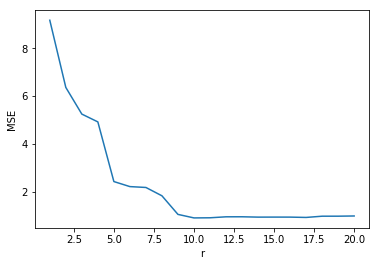

In [15]:
mse=[]
r_range=np.arange(1,21)
for r in r_range:
    svr=SingularValueRegressor(r=r)
    bata=svr.fit(X,y)
    pred=svr.predict(X_test)
    mse_r=metrics.mean_squared_error(y_test,pred)
    mse.append(mse_r)
print(mse)
import matplotlib.pyplot as plt
plt.plot(r_range,mse)
plt.xlabel('r')
plt.ylabel('MSE')


__Exercise 4__ (30 pts)

The dataset in the hw1 directory has a Y variable, 7 predictor variables (X1 - X7).  Using sklearn and the class that you constructed above, compare ridge regression, OLS, kNN, and SVRegression.  Compare and tune the methods using appropriate testing procedures.  Comment on the tuning of each parameter in ridge, kNN, and SVRegression in markdown.  Be sure to standardize the X variables first and decide how to deal with NAs.  

### Answer

<font color=blue>

 - __kNN:__
 When the tunning parameter K is about 4, the loss is minimum and less than the loss of OLS.

 - __Ridge regression:__
 There seems to be no significant improvement when change the tunning paramete, and the loss is almost the same as the loss of OLS.

 - __SVRegression:__
 The loss is minimized at $r=7$, which is choosing all singular values. However, the loss at $r=6$ is closed to the minimum loss at $r=7$. Actually, there is no significant improvement by involving the last singular value. 

</font>

In [16]:
import pandas as pd
from sklearn import model_selection, linear_model, neighbors, preprocessing, metrics

In [17]:
data_mat = pd.read_csv('hw1_data.csv')
data_mat.head()

,Y,X1,X2,X3,X4,X5,X6,X7
0,18.0,8.0,307.0,130.0,3504.0,12.0,70.0,1.0
1,15.0,8.0,350.0,165.0,3693.0,11.5,70.0,1.0
2,18.0,8.0,318.0,150.0,3436.0,11.0,70.0,1.0
3,16.0,8.0,304.0,150.0,3433.0,12.0,70.0,1.0
4,17.0,8.0,302.0,140.0,3449.0,10.5,70.0,1.0


In [18]:
data_mat=data_mat.dropna(axis=0)
y = data_mat['Y'].values
X = data_mat.drop(['Y'],axis=1).values 
test_size = .33
X_tr, X_te, y_tr, y_te = model_selection.train_test_split(X,y,test_size = .33,random_state=2)

In [19]:
stand = preprocessing.StandardScaler()
stand.fit(X_tr)
X_tr = stand.transform(X_tr)
X_te = stand.transform(X_te)

In [20]:
## Fitting OLS 
lr = linear_model.LinearRegression()
lr.fit(X_tr,y_tr)
lr_pred=lr.predict(X_te)
lr_mse=metrics.mean_squared_error(y_te,lr_pred)
lr_mse

11.222165579443152

(7, 17)

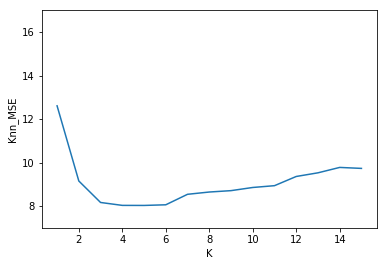

In [21]:
## Fitting Knns
knn_mse = []
neighbors_K = np.arange(1,16)
for k in neighbors_K:
    knn = neighbors.KNeighborsRegressor(n_neighbors=k)
    knn.fit(X_tr,y_tr)
    knn_pred=knn.predict(X_te) 
    mse=metrics.mean_squared_error(y_te,knn_pred)
    knn_mse.append(mse)
plt.plot(neighbors_K,knn_mse)
plt.xlabel('K')
plt.ylabel('Knn_MSE')
plt.ylim(7,17)

(7, 17)

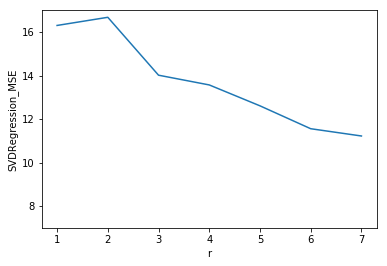

In [22]:
## SVRegression
# add the intercept:
n_tr,p=X_tr.shape
n_te,p=X_te.shape
X_tr_ones=np.hstack((np.ones((n_tr,1)),X_tr))
X_te_ones=np.hstack((np.ones((n_te,1)),X_te))

SVR_mse=[]
r_range=np.arange(1,8)
for r in r_range:
    svr=SingularValueRegressor(r=r+1)
    bata=svr.fit(X_tr_ones,y_tr)
    pred=svr.predict(X_te_ones)
    mse_r=metrics.mean_squared_error(y_te,pred)
    SVR_mse.append(mse_r)

plt.plot(r_range,SVR_mse)
plt.xlabel('r')
plt.ylabel('SVDRegression_MSE')
plt.ylim(7,17)

(7, 17)

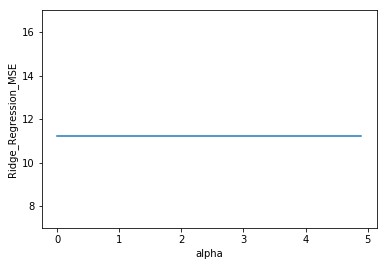

In [23]:
## Ridge Regression
Rdg_mse=[]
lamb_range=np.arange(0,5,0.1)
for lamb in lamb_range:
    rdg=linear_model.Ridge(alpha=lamb)
    rdg.fit(X_tr,y_tr)
    rdg_pred=rdg.predict(X_te)
    mse=metrics.mean_squared_error(y_te,rdg_pred)
    Rdg_mse.append(mse)

plt.plot(lamb_range,Rdg_mse)
plt.xlabel('alpha')
plt.ylabel('Ridge_Regression_MSE')
plt.ylim(7,17)